<strong><h1>Introduction to the Submetric</h1></strong>

This submetric shows information that helps determine which neighborhood is the "best neighborhood" by finding which neighborhoods have fire departments in them and taking the one with the lowest population and deeming that one the "best neighborhood"

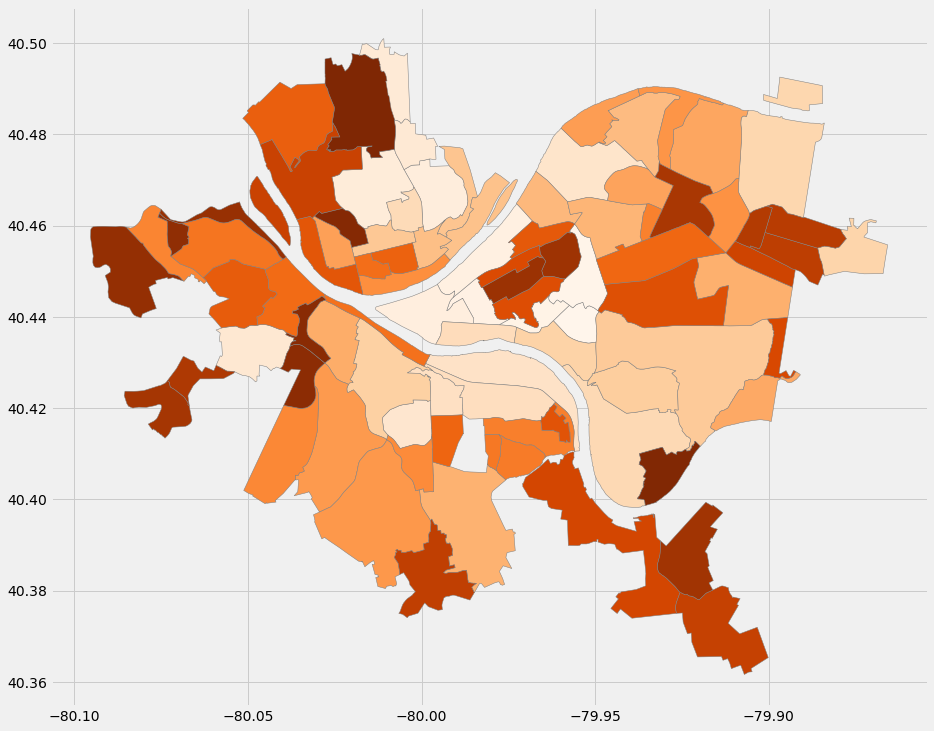

In [1]:
#imported everything needed to get things to work
import pandas as pd
import numpy as np
%matplotlib inline
import geopandas
import matplotlib.pyplot as plt

#sets the style for all the upcoming maps and charts
plt.style.use("fivethirtyeight")

#gives us the map of Pittsburgh
neighborhoodsMap = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhoodsMap.plot(color = "white", edgecolor = "grey", cmap = "Oranges", figsize = (14,14))

In [2]:
#takes from the population file and grabs the information we need from it
population = pd.read_csv("Population.csv", usecols = ["Neighborhood", "Estimate; Total"])

#sorts the information we grabbed by numerical order
population = population.sort_values("Estimate; Total")
population.iloc[0:]

,Neighborhood,Estimate; Total
21,Chateau,3.0
71,South Shore,12.0
57,North Shore,205.0
87,West End,235.0
78,St. Clair,270.0
...,...,...
15,Carrick,10122.0
76,Squirrel Hill North,11336.0
13,Brookline,13160.0
68,Shadyside,13562.0


In [3]:
#much like the prior one, this takes the dataset and selects a few columns that we need
facilities = pd.read_csv("Facilities.csv", usecols = ["name","longitude","latitude","neighborhood","type"])
#narrows down what we need by searching the dataset for the type "Firehouse"
firehouse = facilities[facilities["type"] == "Firehouse"]

#one of the firehouses was not picked up by the filter, so this is the information for it in a DataFrame
outlierFirehouse = pd.DataFrame({"latitude": [40.441413], "longitude": [-79.921139], "type": ["Firehouse"], "name": ["Firehouse 18 Police 04"], "neighborhood": ["Squirrel Hill North"]})

#combines the dataset with the DataFrame and puts it into a list
firehouse = firehouse.append(outlierFirehouse)
firehouse.iloc[0:]

<ipython-input-3-25af975b8e14>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  firehouse = firehouse.append(outlierFirehouse)


,name,type,neighborhood,latitude,longitude
99,Firehouse 06,Firehouse,Lower Lawrenceville,40.464894,-79.958144
100,Firehouse 19,Firehouse,Swisshelm Park,40.420827,-79.899838
101,Firehouse 20 Medic 12,Firehouse,Hays,40.385781,-79.933013
102,Firehouse 24,Firehouse,South Side Flats,40.426354,-79.981299
103,Firehouse 31,Firehouse,Sheraden,40.454572,-80.058537
104,Firehouse 34,Firehouse,Perry North,40.490070,-80.018169
105,Firehouse 32,Firehouse,East Allegheny,40.458012,-79.995130
106,Firehouse 26,Firehouse,Brookline,40.394796,-80.021855
107,Firehouse 23,Firehouse,Carrick,40.398266,-79.988937
108,Firehouse 33 Truck,Firehouse,Marshall-Shadeland,40.476648,-80.029693


In [4]:
#this takes the list above to search through the population dataset to show the population estimates for only the neighborhoods that have fire stations
firehouseObjective = population.merge(firehouse, how = "left", left_on = "Neighborhood", right_on = "neighborhood")

#drops all the uneccesary information and shows another list
firehouseObjective.dropna(inplace = True)
firehouseObjective.drop("neighborhood", axis = 1, inplace = True)
firehouseObjective.drop("type", axis = 1, inplace = True)
firehouseObjective.iloc[0:]

,Neighborhood,Estimate; Total,name,latitude,longitude
9,Hays,405.0,Firehouse 20 Medic 12,40.385781,-79.933013
14,Strip District,747.0,Firehouse 03,40.447693,-79.989800
26,Swisshelm Park,1345.0,Firehouse 19,40.420827,-79.899838
33,West Oakland,1717.0,Firehouse 10 Medic 5,40.441070,-79.967698
39,Manchester,1944.0,Firehouse 37,40.453254,-80.021836
40,East Allegheny,2095.0,Firehouse 32,40.458012,-79.995130
42,Homewood South,2276.0,Firehouse 17,40.453373,-79.890793
45,Spring Hill-City View,2456.0,Firehouse 38,40.472978,-80.002921
46,Elliott,2491.0,Firehouse 30,40.442853,-80.042156
49,Lower Lawrenceville,2572.0,Firehouse 06,40.464894,-79.958144


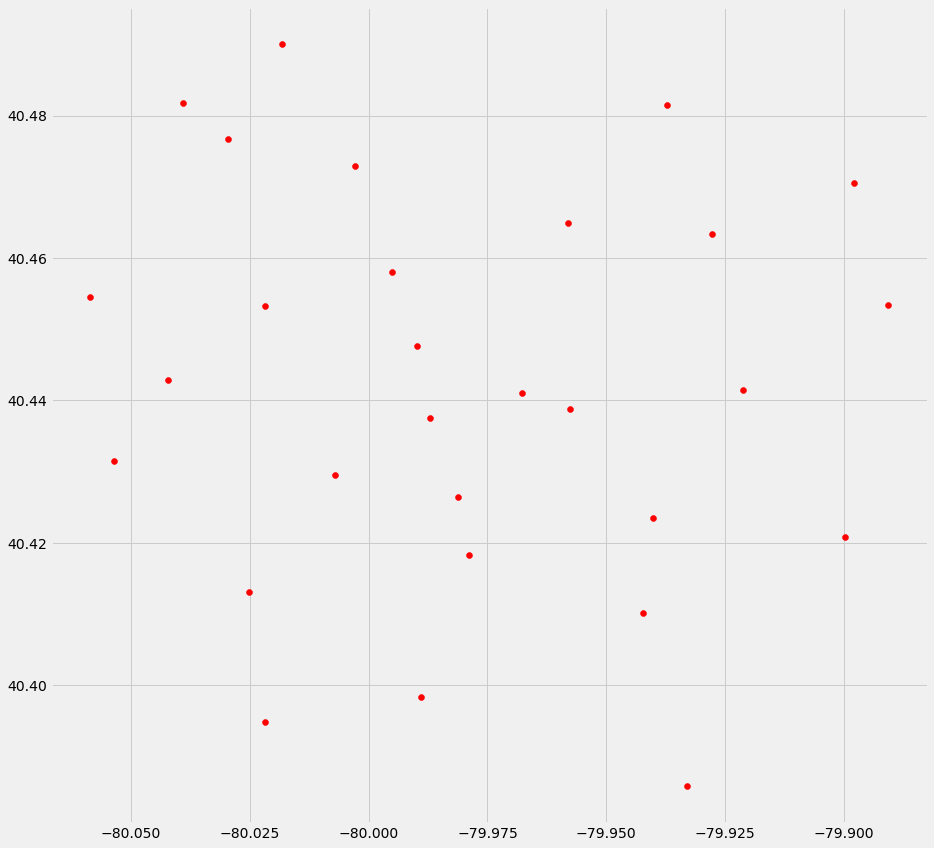

In [5]:
#takes the longitude and latitude and makes it into a scatterplot (notice how it has the same proportions as the map we used above)
x = firehouseObjective["longitude"]
y = firehouseObjective["latitude"]
fig, ax = plt.subplots(figsize = (14, 14))
plt.scatter(x = firehouseObjective.iloc[0:]["longitude"], y = firehouseObjective.iloc[0:]["latitude"], color = "red", marker = "o")
plt.show()

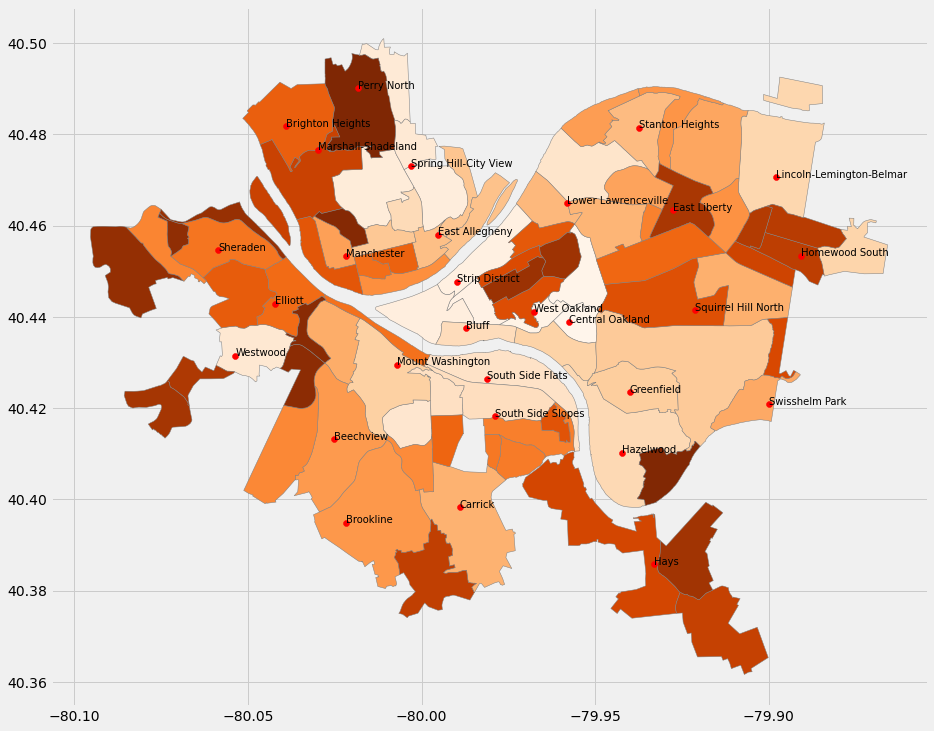

In [6]:
#this takes the map and throws the scatterplot on top of it (the points were made using the coordinates, so makes sense to use them as points on a map)
fig, ax = plt.subplots(figsize = (14, 14))
neighborhoodsMap.plot(ax = ax, color = "white", edgecolor = "grey", cmap="Oranges")
plt.scatter(x = firehouseObjective.iloc[0:]["longitude"], y = firehouseObjective.iloc[0:]["latitude"], color = "red", marker = "o")

#gives the name of the neighborhood the fire station is in
for i, firehouseNeighborhood in firehouseObjective.iterrows():    
    plt.text(firehouseNeighborhood["longitude"], firehouseNeighborhood["latitude"], firehouseNeighborhood["Neighborhood"], fontsize = 10, color = "black")
plt.show()

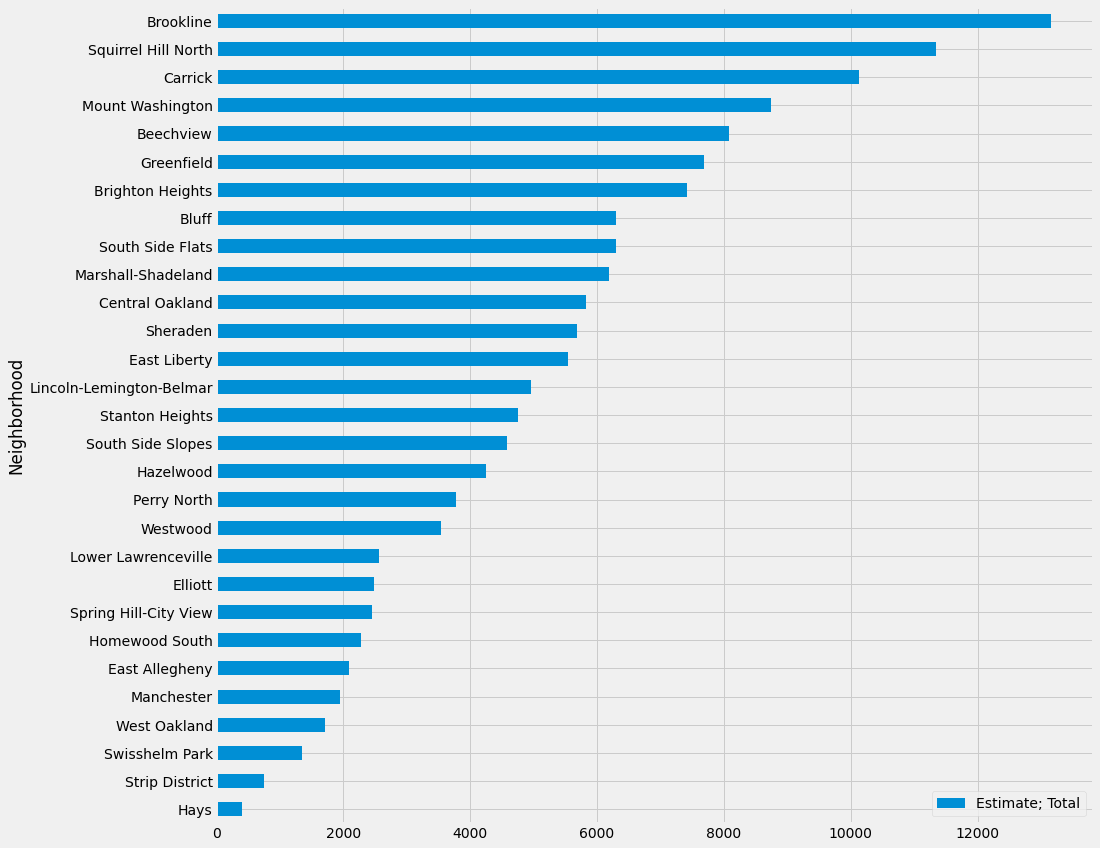

In [8]:
#makes the chart to show the the population with the lowest value being the smallest population
firehouseObjective.drop("longitude", axis = 1, inplace = True)
firehouseObjective.drop("latitude", axis = 1, inplace = True)
firehouseObjective.plot.barh(x = "Neighborhood",figsize = (14,14))

<strong><h1>Conclusion</h1></strong>

Using the data above, it can be concluded that Hays is the best neighborhood by my metric.  Therefore, it can also be concluded that Brookline is also the worst place to be during a fire.